## Comparison of using the individual and averaged cortical activity patterns for the evaluation of a group model 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt

In [ ]:
# To produce an evaluation of the models, using a specific evaluation dataset
import cortico_cereb_connectivity.script.script_eval_corticalact as seh
seh.eval_models_script(eval_id = 'MDTB_Cavg',cortical_act = 'avg')
seh.eval_models_script(eval_id = 'MDTB_Cind',cortical_act = 'ind')


### Summary plot 

In [4]:
dataset_list = ['HCPur100']
models=['MDTB_Cavg','MDTB_Cind']
df = rm.comb_eval(models=models,methods=['L2reg'],eval_data=dataset_list,cerebellum='MNISymC3')


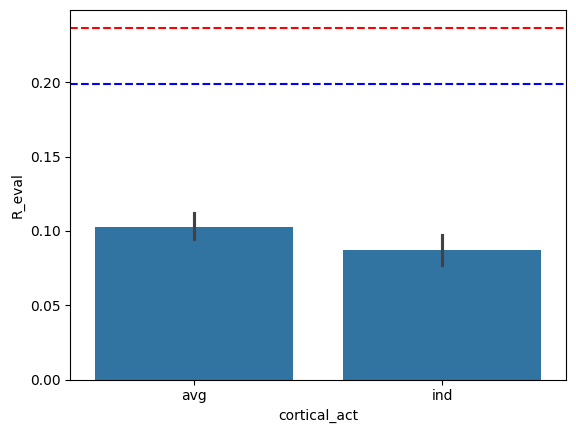

In [15]:
sns.barplot(data=df,x='cortical_act',y='R_eval')
plt.axhline(y=df[df.cortical_act=='avg'].noiseceiling_XY.mean(), color='r', linestyle='--', label='Noise ceiling')
plt.axhline(y=df[df.cortical_act=='ind'].noiseceiling_XY.mean(), color='b', linestyle='--', label='Noise ceiling')

0.21798386247146107

### scaleout-mean-rest vs scaleout-nomean-rest identical?

In [13]:
# Filter the dataset for the specified train datasets
subset1 = d_all_fusion[d_all_fusion['train_dataset'] == 'scaleout-mean-rest'].reset_index(drop=True)
subset2 = d_all_fusion[d_all_fusion['train_dataset'] == 'scaleout-nomean-rest'].reset_index(drop=True)

# Calculate the maximum difference in R_eval
max_difference = (subset1['R_eval'] - subset2['R_eval']).abs().max()
print(f"Maximum difference in R_eval: {max_difference}")

Maximum difference in R_eval: 1.1102230246251565e-16
